## Update Stop Words

In [1]:
from sklearn.feature_extraction import text 

text.ENGLISH_STOP_WORDS

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [4]:
# add network, host names
add_stop_words = ['tucker', 'carlson', 'fox', 'news', 'five', 
                'greg', 'gutfeld', 'dana', 'perino', 'jesse', 'watters', 
                'jeanine', 'pirro', 'geraldo', 'rivera', 'jessica', 'tarlov',
                'harold', 'ford', 'jr', 'ok', 'williams',  'pavlich', 
                'mcdowell', 'juan', 'thanks', 'crosstalk', 'unidentified',
                 'video', 'clip', 'voiceover', 'videotape']

In [5]:
# add custom words to the English set
full_stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

## Define COVID terms
Define groups of terms referring to COVID, vaccines, masks

In [13]:
# covid terms -- Lori added sars, sars-, sars-cov-2
covid_terms = ['coronavirus', 'covid', 'covid-19', 'covid-', 
                'covid19', 'virus', 'sars', 'sars-', 'sars-cov-2']

# vaccine terms -- Lori added pfizer, moderna, johnson
vaccine_terms = ['vaccine', 'vaccination', 'vaccinated', 'mrna', 'booster', 'vax', 'vaxx', 
                'vaxxed', 'pfizer', 'moderna', 'johnson']

# mask terms -- Lori added n95 and kn95
mask_terms = ['mask', 'masking', 'n95', 'kn95']

# other COVID-related terms (can choose to use or not)
other_terms = ['china', 'wuhan', 'mandate', 'pandemic', 'epidemic', 'virus',
                'distancing', 'spread', 'immunity', 'incubation', 'quarantine']

all_covid_terms = covid_terms + other_terms

## Load Data

In [7]:
#import libraries
import glob 
import os
import matplotlib.pyplot as plt
import numpy as np
import string
import re

#step 1: get a list of file names to read into the dataset
repo_path = os.path.dirname(os.getcwd()) #get the correct file path 
tc_paths = glob.glob(repo_path + "/data/01-raw/tucker_carlson/*.txt") #the paths for the tucker carlson transcript files
tf_paths = glob.glob(repo_path + '/data/01-raw/the_five/*.txt') #the paths for the five transcript files

all_conservative_files = tc_paths + tf_paths #all conservative transcripts

## Read files, clean text, store cleaned transcripts and sentences

In [44]:
text_transcripts = [] # container for transcript text
text_sentences = [] # container for sentence text
covid_counts_transcripts = [] # container for transcript covid mention counts
covid_counts_sentences = [] # container for sentence covid mention counts

# read in each transcript, do text cleaning, add text and counts to containers
# split sentences on periods, do text cleaning, add text and counts to containers
# text cleaning is done separately for transcripts and sentences to help split sentences better

#### transcripts as documents
for transcript in all_conservative_files:
    
    # create transcript covid counter
    cov_trans_counter = 0
    
    # read text
    text = open(transcript, encoding = 'utf-8', errors = 'ignore').read().lower()  # Lori ignored a few characters that were not ASCII
    
    ### string cleaning
    # line below replaces periods with spaces because spaces after periods are often missing, then strips extra spaces
    corpus_text = text.replace('\xa0', '').replace('.', ' ').replace('  ', ' ')
    # remove all punctuation
    for c in string.punctuation:
        corpus_text = corpus_text.replace(c, "")
    # remove numbers
    corpus_text = re.sub('\d+', '', corpus_text)
    # remove whitespaces
    corpus_text = " ".join(corpus_text.split())
    
    # add cleaned text to container
    text_transcripts.append(corpus_text)
    
    # add to counter if word in text is in covid terms, add count to container
    for word in corpus_text.split(' '):
        if word in covid_terms:
            cov_trans_counter += 1
    covid_counts_transcripts.append(cov_trans_counter)
    
    
    #### sentences as documents
    for sentence in text.split('.'): # note that splitting on periods is not perfect for identifying sentences
        
        # create sentence covid counter
        cov_sen_counter = 0
        
        ### string cleaning
        corpus_sen = sentence.replace('\xa0', '')
        # remove all punctuation    
        for c in string.punctuation:
            corpus_sen = corpus_sen.replace(c, "")
        # remove numbers            
        corpus_sen = re.sub('\d+', '', corpus_sen)
        # remove whitespaces
        corpus_sen = " ".join(corpus_sen.split())
        
        # add cleaned sentence to container
        text_sentences.append(corpus_sen)
        
        # add to counter if word in sentence is in covid terms, add count to container
        for word in corpus_sen.split(' '):
            if word in covid_terms:
                cov_sen_counter += 1
        covid_counts_sentences.append(cov_sen_counter)  

In [45]:
# display simple counts
print("Our conservative news corpus consists of {:,} total transcripts, sourced from Tucker Carlson Tonight and The Five.".format(len(text_transcripts)))

print("There are {:,} total sentences in the corpus.".format(len(text_sentences)))

print("There are {:,} transcripts that mention COVID at least once.".format(len(text_transcripts) - covid_counts_transcripts.count(0)))

Our conservative news corpus consists of 458 total transcripts, sourced from Tucker Carlson Tonight and The Five.
There are 254,010 total sentences in the corpus.
There are 434 transcripts that mention COVID at least once.


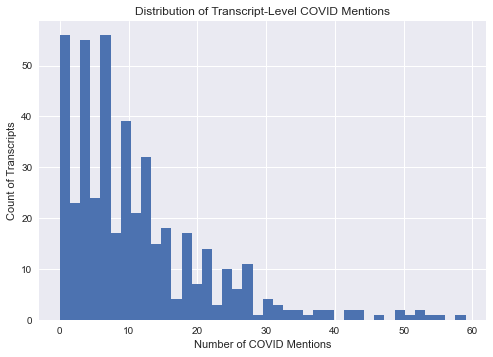

In [10]:
# Distribution of COVID mentions - transcripts
plt.style.use('seaborn')  

plt.hist(covid_counts_transcripts, bins = 40)
plt.xlabel('Number of COVID Mentions')
plt.ylabel('Count of Transcripts')
plt.title('Distribution of Transcript-Level COVID Mentions')

plt.show()

In [14]:
# Lori -- Looked for COVID term counts again using a wider list of terms

all_covid_counts_transcripts = [] # container for transcript covid mention counts
all_covid_counts_sentences = [] # container for sentence covid mention counts

# read in each transcript, do text cleaning, add text and counts to containers
# split sentences on periods, do text cleaning, add text and counts to containers
# text cleaning is done separately for transcripts and sentences to help split sentences better

#### transcripts as documents
for transcript in all_conservative_files: 
    # add to counter if word in text is in the combined covid terms list, add count to container
    for word in corpus_text.split(' '):
        if word in all_covid_terms:
            cov_trans_counter += 1
    all_covid_counts_transcripts.append(cov_trans_counter)
    
    
    #### sentences as documents
    for sentence in text.split('.'): # note that splitting on periods is not perfect for identifying sentences
        
        # create sentence covid counter
        cov_sen_counter = 0
        
        ### string cleaning
        corpus_sen = sentence.replace('\xa0', '')
        # remove all punctuation    
        for c in string.punctuation:
            corpus_sen = corpus_sen.replace(c, "")
        # remove numbers            
        corpus_sen = re.sub('\d+', '', corpus_sen)
        # remove whitespaces
        corpus_sen = " ".join(corpus_sen.split())
        
        # add cleaned sentence to container
        text_sentences.append(corpus_sen)
        
        # add to counter if word in sentence is in covid terms, add count to container
        for word in corpus_sen.split(' '):
            if word in all_covid_terms:
                cov_sen_counter += 1
        all_covid_counts_sentences.append(cov_sen_counter) 

In [15]:
# might be too wide, because now all transcripts are included

print("There are {:,} transcripts that mention COVID at least once.".format(len(text_transcripts) - all_covid_counts_transcripts.count(0)))

There are 458 transcripts that mention COVID at least once.


## Data Pre-Processing

### Spacy Implementation & Removal of Stop Words 
This analysis is useful if we want more control over the corpus of stop words that are used in our analysis

In [ ]:
#Compare spacy implemtation to the sklearn #loads spacy and turns off some aspects 
# import spacy
# nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])

## Word-Frequency Analysis

### Use CountVectorizer to get the unique vocabulary list and eliminate stop words

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from operator import itemgetter

In [17]:
# set up count vectorizer function
def countvec(text_list):
    
    # step 1: set up the vectorizer
    vectorizer = CountVectorizer(min_df = 30, 
                                 stop_words = full_stop_words, 
                                 max_df = 0.8)
    
    # step 2: apply the vectorizer to the corpus of documents and store in document matrix X
    X = vectorizer.fit(text_list)
    
    # step 3: fit transform corpus of documents
    X_transformed = vectorizer.fit_transform(text_list)
    
    # step 4: extract feature names and counts, create dictionary
    array_of_words = vectorizer.get_feature_names() # Lori changed from get_featured_names_out() because her version of library doesn't have that function
    array_of_counts = X_transformed.toarray().sum(axis = 0)
    word_frequency_dictionary = dict(zip(array_of_words, array_of_counts))
    
    return(X, X_transformed, array_of_words, array_of_counts, word_frequency_dictionary)

## Apply CountVectorizer and Plot Top Words
Note: need to double-check how the counts are arrived at - is it by document or number of occurences in a given document?

### Full Transcript Set

In [18]:
# apply function to full transcript set
X_trans, X_transformed_trans, array_of_words_trans, array_of_counts_trans, word_frequency_dictionary_trans = countvec(text_transcripts)

In [19]:
# vocabulary length
print("There are {:,} unique words in the vocabulary.".format(len(X_trans.vocabulary_)))

There are 4,075 unique words in the vocabulary.


In [20]:
# set number of top words to see
num_top_words = 10

top_10_words = dict(sorted(word_frequency_dictionary_trans.items(), key = itemgetter(1), reverse = True)[:num_top_words])

print(top_10_words)

{'police': 2669, 'administration': 1647, 'kids': 1617, 'school': 1612, 'black': 1605, 'quote': 1566, 'vaccine': 1556, 'china': 1511, 'crime': 1501, 'border': 1475}


In [21]:
#check to see if "coronavirus" is in the dictionary, print index value
vocab = X_trans.vocabulary_

vocab['coronavirus']

814

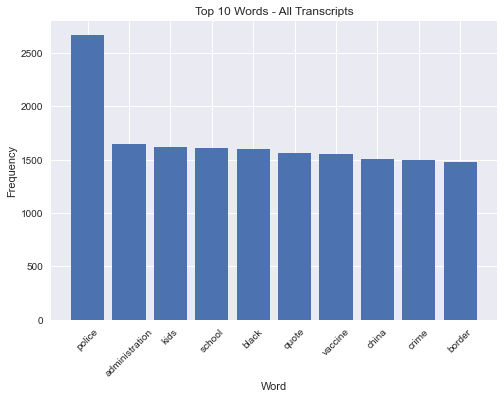

In [22]:
# plot top words
plt.style.use('seaborn')  

x = top_10_words.keys()
y = top_10_words.values()
plt.bar(x,y)
plt.xlabel('Word')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.title('Top 10 Words - All Transcripts')

plt.show()

### Restricted Transcript Set - Nonzero COVID Mentions

In [23]:
# create a restricted transcript list including only transcripts that mention a COVID term at least one
text_trans_cov = [text_transcripts[i] for i in range(len(text_transcripts)) if covid_counts_transcripts[i] > 0]

In [24]:
# apply function to restricted list
X_trans_cov, X_transformed_trans_cov, array_of_words_trans_cov, array_of_counts_trans_cov, word_frequency_dictionary_trans_cov = countvec(text_trans_cov)

In [25]:
# vocabulary length
print("There are {:,} unique words in the vocabulary.".format(len(X_trans_cov.vocabulary_)))

There are 3,911 unique words in the vocabulary.


In [26]:
# check to see if "coronavirus" is in the dictionary, print index
vocab = X_trans_cov.vocabulary_

vocab['coronavirus']

787

In [27]:
# set the number of top words
num_top_words = 10

top_10_words = dict(sorted(word_frequency_dictionary_trans_cov.items(), key = itemgetter(1), reverse = True)[:num_top_words])

print(top_10_words)

{'police': 2520, 'school': 1574, 'kids': 1553, 'vaccine': 1552, 'black': 1512, 'quote': 1495, 'china': 1463, 'crime': 1441, 'coronavirus': 1408, 'border': 1378}


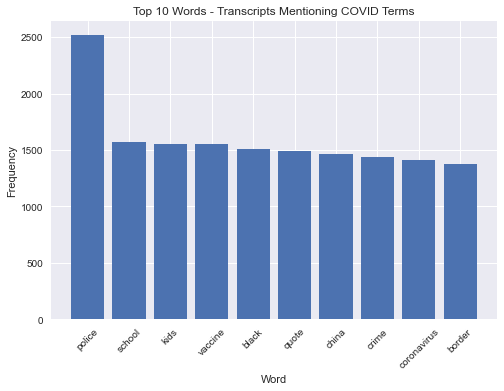

In [28]:
# plot top words
plt.style.use('seaborn')  

x = top_10_words.keys()
y = top_10_words.values()
plt.bar(x,y)
plt.xlabel('Word')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.title('Top 10 Words - Transcripts Mentioning COVID Terms')

plt.show()

In [29]:
# Lori expanded number of top words to see if that increased number of COVID terms in results.
num_top_words = 20

top_20_words = dict(sorted(word_frequency_dictionary_trans_cov.items(), key = itemgetter(1), reverse = True)[:num_top_words])

print(top_20_words)

{'police': 2520, 'school': 1574, 'kids': 1553, 'vaccine': 1552, 'black': 1512, 'quote': 1495, 'china': 1463, 'crime': 1441, 'coronavirus': 1408, 'border': 1378, 'shes': 1371, 'mask': 1364, 'health': 1332, 'children': 1221, 'virus': 1213, 'federal': 1171, 'governor': 1165, 'fauci': 1152, 'dr': 1137, 'republicans': 1128}


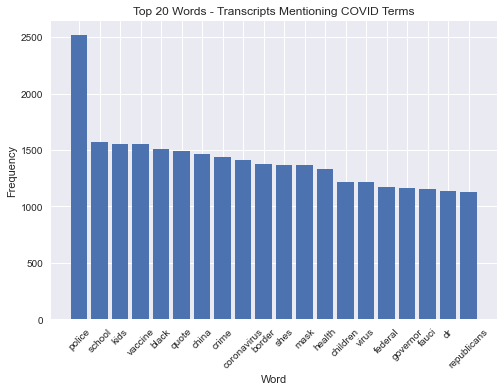

In [30]:
# Lori also plotted top 20 words
plt.style.use('seaborn')  

x = top_20_words.keys()
y = top_20_words.values()
plt.bar(x,y)
plt.xlabel('Word')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.title('Top 20 Words - Transcripts Mentioning COVID Terms')

plt.show()

### Full Sentence Set

Lori didn't run this part because her computer didn't have enough memory!

In [31]:
# apply function to sentences -- Lori getting a memory error because she only has 8 GiB of RAM on her computer: 
# Unable to allocate 22.2 GiB for an array with shape (525604, 5676) and data type int64
X_sen, X_transformed_sen, array_of_words_sen, array_of_counts_sen, word_frequency_dictionary_sen = countvec(text_sentences)

In [32]:
#check to see if "coronavirus" is in the dictionary, print index
vocab = X_sen.vocabulary_

vocab['coronavirus']

1140

In [33]:
#set the number of top words to see
num_top_words = 10

top_10_words = dict(sorted(word_frequency_dictionary_sen.items(), key = itemgetter(1), reverse = True)[:num_top_words])

print(top_10_words)

{'going': 36675, 'know': 36562, 'think': 35598, 'people': 31503, 'thats': 26871, 'just': 26800, 'dont': 26353, 'like': 26325, 'want': 23386, 'president': 21341}


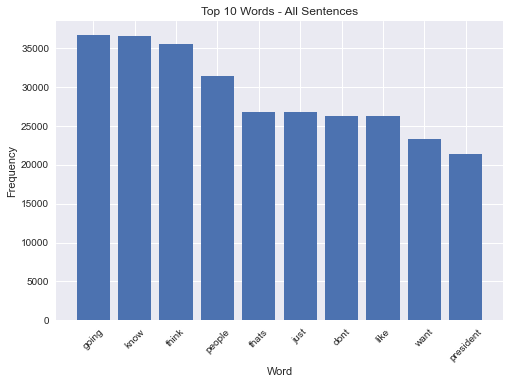

In [34]:
# plot top words
plt.style.use('seaborn')  

x = top_10_words.keys()
y = top_10_words.values()
plt.bar(x,y)
plt.xlabel('Word')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.title('Top 10 Words - All Sentences')

plt.show()

### Restricted Sentence Set - Nonzero COVID Mentions

In [47]:
# create a restricted transcript list including only transcripts that mention a COVID term at least once
text_sen_cov = [text_sentences[i] for i in range(len(text_sentences)) if covid_counts_sentences[i] > 0]

In [48]:
# apply function to restricted list
X_sen_cov, X_transformed_sen_cov, array_of_words_sen_cov, array_of_counts_sen_cov, word_frequency_dictionary_sen_cov = countvec(text_sen_cov)

In [49]:
# vocabulary length
print("There are {:,} unique words in the vocabulary.".format(len(X_sen_cov.vocabulary_)))

There are 292 unique words in the vocabulary.


In [50]:
# check to see if "coronavirus" is in the dictionary, print index
vocab = X_sen_cov.vocabulary_

vocab['coronavirus']

45

In [51]:
# set the number of top words to see
num_top_words = 10

top_10_words = dict(sorted(word_frequency_dictionary_sen_cov.items(), key = itemgetter(1), reverse = True)[:num_top_words])

print(top_10_words)

{'covid': 2537, 'coronavirus': 1408, 'virus': 1213, 'people': 829, 'know': 481, 'going': 370, 'just': 360, 'new': 318, 'like': 315, 'think': 314}


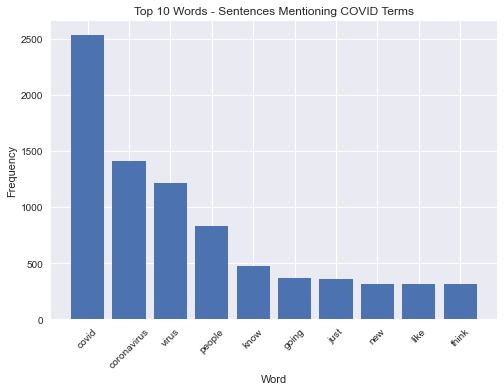

In [52]:
# plot top words
plt.style.use('seaborn')  

x = top_10_words.keys()
y = top_10_words.values()
plt.bar(x,y)
plt.xlabel('Word')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.title('Top 10 Words - Sentences Mentioning COVID Terms')

plt.show()

## Co-Occurence Analysis

- Need to do string cleaning. 
- For now, appearance anywhere in a transcript increases count by 1.
- it might make sense to do this with the count vectorizer from above?

In [53]:
# import packages
from collections import Counter
import spacy
import numpy as np

## Transcript-Level Co-Occurrence

In [54]:
nlp = spacy.load('en_core_web_sm', disable = ['parser'])

In [55]:
%%time
conservative_nlp = [nlp(text) for text in text_transcripts]

Wall time: 12min 52s


In [56]:
# create counters
lemma_counter = Counter()
covid_co_counter = Counter()
covid_count = 0
mask_co_counter = Counter()
mask_count = 0
vaccine_co_counter = Counter()
vaccine_count = 0

# for each document, add unique lemmas to counter
# increase co-occurrence and covid counter if covid terms overlap lemma set
# same for mask terms, vaccine terms
for transcript in conservative_nlp:
    lemmas = {token.lemma_.lower() for token in transcript}
    lemma_counter.update(lemmas)
    if not lemmas.isdisjoint(set(covid_terms)):
        covid_co_counter.update(lemmas)
        covid_count += 1
    if not lemmas.isdisjoint(set(mask_terms)):
        mask_co_counter.update(lemmas)
        mask_count += 1
    if not lemmas.isdisjoint(set(vaccine_terms)):
        vaccine_co_counter.update(lemmas)
        vaccine_count += 1

In [57]:
# calculate COVID terms PMI
# P(covid)
covid_ratio = covid_count / len(conservative_nlp)

# calculate PMI only for words that co-occur
pmi_covid = list()
for lemma, count in covid_co_counter.items():
    
    lemma_ratio = lemma_counter[lemma] / len(conservative_nlp) # P(lemma)
    co_ratio = covid_co_counter[lemma] / len(conservative_nlp) # P(covid, lemma)
    
    # store lemma, total lemma count, co-occur count, and PMI
    pmi_covid += [(lemma, lemma_counter[lemma], covid_co_counter[lemma], 
                   np.log2(co_ratio / (covid_ratio * lemma_ratio)))]

# sort list of tuples by pmi then by lemma count, descending
pmi_covid_sort = sorted(pmi_covid, key = lambda x: [round(x[3], 5), x[1]], reverse = True)

In [59]:
# calculate mask terms PMI
# P(mask)
mask_ratio = mask_count / len(conservative_nlp)

# calculate PMI only for words that co-occur
pmi_mask = list()
for lemma, count in mask_co_counter.items():
    
    lemma_ratio = lemma_counter[lemma] / len(conservative_nlp) # P(lemma)
    co_ratio = mask_co_counter[lemma] / len(conservative_nlp) # P(mask, lemma)
    
    # store lemma, total lemma count, co-occur count, and PMI
    pmi_mask += [(lemma, lemma_counter[lemma], mask_co_counter[lemma], 
                   np.log2(co_ratio / (mask_ratio * lemma_ratio)))]

# sort list of tuples by pmi then by lemma count, descending
pmi_mask_sort = sorted(pmi_mask, key = lambda x: [round(x[3], 5), x[1]], reverse = True)

In [60]:
# calculate vaccine terms PMI
# P(vaccine)
vaccine_ratio = vaccine_count / len(conservative_nlp)

# calculate PMI only for words that co-occur
pmi_vaccine = list()
for lemma, count in vaccine_co_counter.items():
    
    lemma_ratio = lemma_counter[lemma] / len(conservative_nlp) # P(lemma)
    co_ratio = vaccine_co_counter[lemma] / len(conservative_nlp) # P(vaccine, lemma)
    
    # store lemma, total lemma count, co-occur count, and PMI
    pmi_vaccine += [(lemma, lemma_counter[lemma], vaccine_co_counter[lemma], 
                   np.log2(co_ratio / (vaccine_ratio * lemma_ratio)))]

# sort list of tuples by pmi then by lemma count, descending
pmi_vaccine_sort = sorted(pmi_vaccine, key = lambda x: [round(x[3], 5), x[1]], reverse = True)

In [61]:
# print top 100 words (by PMI) that co-occur with COVID terms
counter = 0
print('{:<25} {:<15} {:<15} {:<15}'.format('Word', 'Word Count', 'Co-Occur Count', 'PMI'))
print('-' * 70)
for lemma in pmi_covid_sort:
    if (lemma[0] not in full_stop_words) and (lemma[0] not in covid_terms) and (counter < 100):
        print('{:<25} {:<15} {:<15} {:<15}'.format(lemma[0], lemma[1], lemma[2], round(lemma[3], 5)))
        counter += 1

Word                      Word Count      Co-Occur Count  PMI            
----------------------------------------------------------------------
science                   250             250             0.07765        
lockdown                  148             148             0.07765        
infect                    136             136             0.07765        
infection                 118             118             0.07765        
criticism                 107             107             0.07765        
testing                   102             102             0.07765        
quarantine                102             102             0.07765        
infectious                98              98              0.07765        
scientific                94              94              0.07765        
distancing                92              92              0.07765        
boss                      89              89              0.07765        
cdc                       89             

In [62]:
# print top 100 words (by PMI) that co-occur with COVID terms given that lemma count > 300
counter = 0
print('{:<25} {:<15} {:<15} {:<15}'.format('Word', 'Word Count', 'Co-Occur Count', 'PMI'))
print('-' * 70)
for lemma in pmi_covid_sort:
    if (lemma[0] not in full_stop_words) and (lemma[0] not in covid_terms) and (counter < 100) and (lemma[1] > 300):
        print('{:<25} {:<15} {:<15} {:<15}'.format(lemma[0], lemma[1], lemma[2], round(lemma[3], 5)))
        counter += 1

Word                      Word Count      Co-Occur Count  PMI            
----------------------------------------------------------------------
mask                      331             329             0.06891        
governor                  318             312             0.05017        
pandemic                  337             330             0.04737        
health                    332             325             0.04691        
wear                      329             319             0.03312        
company                   309             299             0.03019        
federal                   336             325             0.02963        
death                     342             330             0.02612        
free                      348             335             0.02273        
decision                  314             302             0.02144        
claim                     339             326             0.02124        
quote                     331            

In [63]:
# print top 100 words (by PMI) that co-occur with mask terms
counter = 0
print('{:<25} {:<15} {:<15} {:<15}'.format('Word', 'Word Count', 'Co-Occur Count', 'PMI'))
print('-' * 70)
for lemma in pmi_mask_sort:
    if (lemma[0] not in full_stop_words) and (lemma[0] not in mask_terms) and (counter < 100):
        print('{:<25} {:<15} {:<15} {:<15}'.format(lemma[0], lemma[1], lemma[2], round(lemma[3], 5)))
        counter += 1

Word                      Word Count      Co-Occur Count  PMI            
----------------------------------------------------------------------
maskless                  32              32              0.45983        
surgical                  17              17              0.45983        
attendant                 17              17              0.45983        
bowser                    16              16              0.45983        
illusion                  16              16              0.45983        
declassify                16              16              0.45983        
facemask                  15              15              0.45983        
covering                  14              14              0.45983        
muriel                    14              14              0.45983        
amtrak                    14              14              0.45983        
disobey                   13              13              0.45983        
punitive                  13             

In [64]:
# print top 100 words (by PMI) that co-occur with mask terms given that lemma count > 300
counter = 0
print('{:<25} {:<15} {:<15} {:<15}'.format('Word', 'Word Count', 'Co-Occur Count', 'PMI'))
print('-' * 70)
for lemma in pmi_mask_sort:
    if (lemma[0] not in full_stop_words) and (lemma[0] not in mask_terms) and (counter < 100) and (lemma[1] > 300):
        print('{:<25} {:<15} {:<15} {:<15}'.format(lemma[0], lemma[1], lemma[2], round(lemma[3], 5)))
        counter += 1

Word                      Word Count      Co-Occur Count  PMI            
----------------------------------------------------------------------
wear                      329             286             0.25775        
pandemic                  337             266             0.1185         
governor                  318             251             0.11849        
covid                     392             307             0.10721        
health                    332             260             0.10715        
company                   309             239             0.08923        
federal                   336             258             0.07874        
outside                   316             242             0.07491        
shut                      307             235             0.07425        
sort                      326             247             0.05946        
republican                371             281             0.05898        
business                  366            

In [65]:
# print top 100 words (by PMI) that co-occur with vaccine terms
counter = 0
print('{:<25} {:<15} {:<15} {:<15}'.format('Word', 'Word Count', 'Co-Occur Count', 'PMI'))
print('-' * 70)
for lemma in pmi_vaccine_sort:
    if (lemma[0] not in full_stop_words) and (lemma[0] not in vaccine_terms) and (counter < 100):
        print('{:<25} {:<15} {:<15} {:<15}'.format(lemma[0], lemma[1], lemma[2], round(lemma[3], 5)))
        counter += 1

Word                      Word Count      Co-Occur Count  PMI            
----------------------------------------------------------------------
unvaccinated              79              79              0.57242        
unvaccinate               31              31              0.57242        
jab                       17              17              0.57242        
neurotic                  17              17              0.57242        
antivaxxer                17              17              0.57242        
boris                     16              16              0.57242        
hesitancy                 15              15              0.57242        
positivity                14              14              0.57242        
antivax                   14              14              0.57242        
neanderthal               14              14              0.57242        
georgetown                13              13              0.57242        
punitive                  13             

In [66]:
# print top 100 words (by PMI) that co-occur with vaccine terms given that lemma count > 300
counter = 0
print('{:<25} {:<15} {:<15} {:<15}'.format('Word', 'Word Count', 'Co-Occur Count', 'PMI'))
print('-' * 70)
for lemma in pmi_vaccine_sort:
    if (lemma[0] not in full_stop_words) and (lemma[0] not in vaccine_terms) and (counter < 100) and (lemma[1] > 300):
        print('{:<25} {:<15} {:<15} {:<15}'.format(lemma[0], lemma[1], lemma[2], round(lemma[3], 5)))
        counter += 1

Word                      Word Count      Co-Occur Count  PMI            
----------------------------------------------------------------------
mask                      331             249             0.16173        
covid                     392             286             0.11758        
media                     327             238             0.11409        
administration            374             270             0.10234        
wear                      329             237             0.09922        
pandemic                  337             242             0.09468        
governor                  318             228             0.09242        
company                   309             221             0.08886        
rule                      314             224             0.08515        
open                      371             264             0.08154        
health                    332             236             0.08002        
u                         357            

## Sentence-Level Co-Occurrence

In [67]:
# instantiate nlp
nlp = spacy.load('en_core_web_sm', disable = ['ner', 'parser'])

In [68]:
# split sentences into batches
text_sentences_batches = np.array_split(text_sentences, 10)

In [69]:
%%time
# nlp parse batches
nlp_list_sen = []
for batch in text_sentences_batches:
    print('working') # will print 10 times total
    for sentence in batch:
        nlp_list_sen.append(nlp(str(sentence)))

working
working
working
working
working
working
working
working
working
working
Wall time: 25min 58s


In [70]:
# create counters
lemma_counter = Counter()
covid_co_counter = Counter()
covid_count = 0
mask_co_counter = Counter()
mask_count = 0
vaccine_co_counter = Counter()
vaccine_count = 0

# for each document, add unique lemmas to counter
# increase co-occurrence and covid counter if covid terms overlap lemma set
# same for mask terms, vaccine terms
for sentence in nlp_list_sen:
    lemmas = {token.lemma_.lower() for token in sentence}
    lemma_counter.update(lemmas)
    if not lemmas.isdisjoint(set(covid_terms)):
        covid_co_counter.update(lemmas)
        covid_count += 1
    if not lemmas.isdisjoint(set(mask_terms)):
        mask_co_counter.update(lemmas)
        mask_count += 1
    if not lemmas.isdisjoint(set(vaccine_terms)):
        vaccine_co_counter.update(lemmas)
        vaccine_count += 1

In [71]:
# calculate COVID term PMI
# P(covid)
covid_ratio = covid_count / len(nlp_list_sen)

# calculate PMI only for words that co-occur
pmi_covid = list()
for lemma, count in covid_co_counter.items():
    
    lemma_ratio = lemma_counter[lemma] / len(nlp_list_sen) # P(lemma)
    co_ratio = covid_co_counter[lemma] / len(nlp_list_sen) # P(covid, lemma)
    
    # store lemma, total lemma count, co-occur count, and PMI
    pmi_covid += [(lemma, lemma_counter[lemma], covid_co_counter[lemma], 
                   np.log2(co_ratio / (covid_ratio * lemma_ratio)))]

# sort list of tuples by pmi then by lemma count, descending
pmi_covid_sort = sorted(pmi_covid, key = lambda x: [round(x[3], 5), x[1]], reverse = True)

In [72]:
# calculate mask term PMI
# P(mask)
mask_ratio = mask_count / len(nlp_list_sen)

# calculate PMI only for words that co-occur
pmi_mask = list()
for lemma, count in mask_co_counter.items():
    
    lemma_ratio = lemma_counter[lemma] / len(nlp_list_sen) # P(lemma)
    co_ratio = mask_co_counter[lemma] / len(nlp_list_sen) # P(mask, lemma)
    
    # store lemma, total lemma count, co-occur count, and PMI
    pmi_mask += [(lemma, lemma_counter[lemma], mask_co_counter[lemma], 
                   np.log2(co_ratio / (mask_ratio * lemma_ratio)))]

# sort list of tuples by pmi then by lemma count, descending
pmi_mask_sort = sorted(pmi_mask, key = lambda x: [round(x[3], 5), x[1]], reverse = True)

In [73]:
# calculate vaccine term PMI
# P(vaccine)
vaccine_ratio = vaccine_count / len(nlp_list_sen)

# calculate PMI only for words that co-occur
pmi_vaccine = list()
for lemma, count in vaccine_co_counter.items():
    
    lemma_ratio = lemma_counter[lemma] / len(nlp_list_sen) # P(lemma)
    co_ratio = vaccine_co_counter[lemma] / len(nlp_list_sen) # P(vaccine, lemma)
    
    # store lemma, total lemma count, co-occur count, and PMI
    pmi_vaccine += [(lemma, lemma_counter[lemma], vaccine_co_counter[lemma], 
                   np.log2(co_ratio / (vaccine_ratio * lemma_ratio)))]

# sort list of tuples by pmi then by lemma count, descending
pmi_vaccine_sort = sorted(pmi_vaccine, key = lambda x: [round(x[3], 5), x[1]], reverse = True)

In [74]:
# print top 100 words (by PMI) that co-occur with COVID terms
counter = 0
print('{:<25} {:<15} {:<15} {:<15}'.format('Word', 'Word Count', 'Co-Occur Count', 'PMI'))
print('-' * 70)
for lemma in pmi_covid_sort:
    if (lemma[0] not in full_stop_words) and (lemma[0] not in covid_terms) and (counter < 100):
        print('{:<25} {:<15} {:<15} {:<15}'.format(lemma[0], lemma[1], lemma[2], round(lemma[3], 5)))
        counter += 1

Word                      Word Count      Co-Occur Count  PMI            
----------------------------------------------------------------------
artificially              4               4               5.7224         
combining                 3               3               5.7224         
mer                       3               3               5.7224         
orthopedist               2               2               5.7224         
karam                     2               2               5.7224         
transmissibility          2               2               5.7224         
frontal                   2               2               5.7224         
didi                      2               2               5.7224         
raoult                    2               2               5.7224         
wellcontrolle             2               2               5.7224         
rubella                   2               2               5.7224         
niaid                     2              

In [75]:
# print top 100 words (by PMI) that co-occur with COVID terms given that lemma count > 300
counter = 0
print('{:<25} {:<15} {:<15} {:<15}'.format('Word', 'Word Count', 'Co-Occur Count', 'PMI'))
print('-' * 70)
for lemma in pmi_covid_sort:
    if (lemma[0] not in full_stop_words) and (lemma[0] not in covid_terms) and (counter < 100) and (lemma[1] > 300):
        print('{:<25} {:<15} {:<15} {:<15}'.format(lemma[0], lemma[1], lemma[2], round(lemma[3], 5)))
        counter += 1

Word                      Word Count      Co-Occur Count  PMI            
----------------------------------------------------------------------
wuhan                     332             158             4.65115        
spread                    610             229             4.30894        
lab                       409             138             4.15497        
patient                   336             100             3.97394        
positive                  328             92              3.88841        
chinese                   620             140             3.57556        
test                      914             185             3.41774        
response                  477             94              3.37915        
lockdown                  317             61              3.3448         
vaccine                   1892            321             3.16314        
die                       1057            174             3.11959        
death                     1039           

In [76]:
# print top 100 words (by PMI) that co-occur with mask terms
counter = 0
print('{:<25} {:<15} {:<15} {:<15}'.format('Word', 'Word Count', 'Co-Occur Count', 'PMI'))
print('-' * 70)
for lemma in pmi_mask_sort:
    if (lemma[0] not in full_stop_words) and (lemma[0] not in mask_terms) and (counter < 100):
        print('{:<25} {:<15} {:<15} {:<15}'.format(lemma[0], lemma[1], lemma[2], round(lemma[3], 5)))
        counter += 1

Word                      Word Count      Co-Occur Count  PMI            
----------------------------------------------------------------------
thrice                    4               4               6.88172        
reimplemente              2               2               6.88172        
kn                        2               2               6.88172        
wearer                    2               2               6.88172        
nylon                     2               2               6.88172        
feuding                   2               2               6.88172        
nakedness                 1               1               6.88172        
immolate                  1               1               6.88172        
preston                   1               1               6.88172        
kooky                     1               1               6.88172        
expressionless            1               1               6.88172        
promasker                 1              

In [77]:
# print top 100 words (by PMI) that co-occur with mask terms given that lemma count > 300
counter = 0
print('{:<25} {:<15} {:<15} {:<15}'.format('Word', 'Word Count', 'Co-Occur Count', 'PMI'))
print('-' * 70)
for lemma in pmi_mask_sort:
    if (lemma[0] not in full_stop_words) and (lemma[0] not in mask_terms) and (counter < 100) and (lemma[1] > 300):
        print('{:<25} {:<15} {:<15} {:<15}'.format(lemma[0], lemma[1], lemma[2], round(lemma[3], 5)))
        counter += 1

Word                      Word Count      Co-Occur Count  PMI            
----------------------------------------------------------------------
wear                      1314            870             6.28685        
mandate                   770             211             5.01411        
vaccinate                 791             126             4.23147        
outside                   664             83              3.88172        
require                   350             43              3.85678        
face                      1243            81              2.94196        
science                   804             52              2.93111        
restaurant                378             22              2.77891        
school                    2221            129             2.77596        
child                     1585            92              2.77502        
walk                      759             43              2.74003        
fauci                     1102           

In [78]:
# print top 100 words (by PMI) that co-occur with vaccine terms
counter = 0
print('{:<25} {:<15} {:<15} {:<15}'.format('Word', 'Word Count', 'Co-Occur Count', 'PMI'))
print('-' * 70)
for lemma in pmi_vaccine_sort:
    if (lemma[0] not in full_stop_words) and (lemma[0] not in vaccine_terms) and (counter < 100):
        print('{:<25} {:<15} {:<15} {:<15}'.format(lemma[0], lemma[1], lemma[2], round(lemma[3], 5)))
        counter += 1

Word                      Word Count      Co-Occur Count  PMI            
----------------------------------------------------------------------
modernas                  2               2               6.51003        
bancel                    2               2               6.51003        
stephane                  2               2               6.51003        
pfizerbiontech            2               2               6.51003        
compulsory                2               2               6.51003        
rna                       2               2               6.51003        
sms                       2               2               6.51003        
pericarditis              2               2               6.51003        
datalink                  2               2               6.51003        
promandate                2               2               6.51003        
achievable                2               2               6.51003        
sanofi                    2              

In [79]:
# print top 100 words (by PMI) that co-occur with vaccine terms given that lemma count > 300
counter = 0
print('{:<25} {:<15} {:<15} {:<15}'.format('Word', 'Word Count', 'Co-Occur Count', 'PMI'))
print('-' * 70)
for lemma in pmi_vaccine_sort:
    if (lemma[0] not in full_stop_words) and (lemma[0] not in vaccine_terms) and (counter < 100) and (lemma[1] > 300):
        print('{:<25} {:<15} {:<15} {:<15}'.format(lemma[0], lemma[1], lemma[2], round(lemma[3], 5)))
        counter += 1

Word                      Word Count      Co-Occur Count  PMI            
----------------------------------------------------------------------
mandate                   770             254             4.91           
shot                      489             91              4.08413        
require                   350             50              3.70267        
covid                     2377            337             3.69171        
vaccinate                 791             105             3.59674        
effect                    440             51              3.40109        
rate                      504             55              3.31411        
worker                    449             44              3.15889        
risk                      661             57              2.97441        
announce                  559             44              2.84276        
employee                  318             25              2.841          
mask                      2136           

# Topic Modeling

In [81]:
from sklearn.decomposition import LatentDirichletAllocation

## Full Transcript Set

In [82]:
%%time
# vary number of topics
for k in [4, 6, 8, 10, 12]:
    
    lda = LatentDirichletAllocation(n_components = k, 
                                    random_state = 0)

    lda.fit(X_transformed_trans)
    
    topic_word_dist = np.array([row / row.sum() for row in lda.components_])
    
    print('-' * 50)
    print('Number of topics:', k)
    
    # list top 20 words in each topic
    for topic_idx in range(k):
        print('\n', 'Topic ', topic_idx, ':', sep = '')
        sort_idx = np.argsort(-topic_word_dist[topic_idx])
        for rank in range(20):
            word_idx = sort_idx[rank]
            print('{:<80} {:<10}'.format(array_of_words_trans[word_idx], topic_word_dist[topic_idx, word_idx]))

--------------------------------------------------
Number of topics: 4

Topic 0:
afghanistan                                                                      0.01622655614671066
taliban                                                                          0.011127366375849615
military                                                                         0.008408319216347368
ukraine                                                                          0.0067503925002734095
war                                                                              0.005914731025404027
russia                                                                           0.005853956079393535
montgomery                                                                       0.005702702624214933
putin                                                                            0.0046786185091379304
administration                                                                   0.004519888436519339


--------------------------------------------------
Number of topics: 6

Topic 0:
afghanistan                                                                      0.020347146002864323
taliban                                                                          0.014116924978048504
military                                                                         0.009682970284259395
ukraine                                                                          0.008514955811261101
russia                                                                           0.0070773888795608204
war                                                                              0.006841104673896926
putin                                                                            0.005712795536065545
afghan                                                                           0.005671012568439524
troops                                                                           0.0052130570920406885

--------------------------------------------------
Number of topics: 8

Topic 0:
afghanistan                                                                      0.02647619334725208
taliban                                                                          0.018773403899097943
military                                                                         0.010852356642538573
afghan                                                                           0.007540882764011533
war                                                                              0.005396696694202536
airport                                                                          0.005230691792754281
troops                                                                           0.00502518150709496
administration                                                                   0.004861651330272274
leave                                                                            0.00451390358475025
kabu

--------------------------------------------------
Number of topics: 10

Topic 0:
afghanistan                                                                      0.02750830960492075
taliban                                                                          0.019496909345623214
military                                                                         0.011199888778502726
afghan                                                                           0.007831053068336357
airport                                                                          0.005482646040065275
war                                                                              0.005330971767557885
troops                                                                           0.005255643675752333
administration                                                                   0.004881002964310886
leave                                                                            0.004608680611514694
k

--------------------------------------------------
Number of topics: 12

Topic 0:
afghanistan                                                                      0.028533729931826977
taliban                                                                          0.020254103193683325
military                                                                         0.01167658371269641
afghan                                                                           0.00813486618147647
war                                                                              0.005573840891041934
airport                                                                          0.005493318949157304
troops                                                                           0.005257818794768104
administration                                                                   0.00510410470442705
secretary                                                                        0.004762217146533122
kab

In [83]:
# fit with 10 topics
num_topics = 10

lda = LatentDirichletAllocation(n_components = num_topics, 
                                random_state = 0)

lda.fit(X_transformed_trans)

LatentDirichletAllocation(random_state=0)

In [84]:
# normalize to get probability distributions
topic_word_dist = np.array([row / row.sum() for row in lda.components_])

In [85]:
# list top 20 words in each topic
for topic_idx in range(num_topics):
    print('\n', 'Topic ', topic_idx, ':', sep = '')
    sort_idx = np.argsort(-topic_word_dist[topic_idx])
    for rank in range(20):
        word_idx = sort_idx[rank]
        print('{:<80} {:<10}'.format(array_of_words_trans[word_idx], topic_word_dist[topic_idx, word_idx]))


Topic 0:
afghanistan                                                                      0.02750830960492075
taliban                                                                          0.019496909345623214
military                                                                         0.011199888778502726
afghan                                                                           0.007831053068336357
airport                                                                          0.005482646040065275
war                                                                              0.005330971767557885
troops                                                                           0.005255643675752333
administration                                                                   0.004881002964310886
leave                                                                            0.004608680611514694
kabul                                                                    

In [89]:
from wordcloud import WordCloud

for topic_idx in range(num_topics):
    wc = WordCloud(max_words = 100)
    wc.generate_from_frequencies(dict(zip(array_of_words_trans, topic_word_dist[topic_idx])))
    plt.figure()
    plt.imshow(wc, interpolation = 'bilinear')
    plt.title('Topic %d' % topic_idx)
    plt.grid(visible = None)

ModuleNotFoundError: No module named 'wordcloud'

## Restricted Transcript Set - Nonzero COVID Mentions

In [90]:
%%time
# vary number of topics
for k in [9, 12, 15]:
    
    lda = LatentDirichletAllocation(n_components = k, 
                                    random_state = 0)

    lda.fit(X_transformed_trans_cov)
    
    topic_word_dist = np.array([row / row.sum() for row in lda.components_])
    
    print('-' * 50)
    print('Number of topics:', k)
    
    # list top 20 words in each topic
    for topic_idx in range(k):
        print('\n', 'Topic ', topic_idx, ':', sep = '')
        sort_idx = np.argsort(-topic_word_dist[topic_idx])
        for rank in range(20):
            word_idx = sort_idx[rank]
            print('{:<80} {:<10}'.format(array_of_words_trans[word_idx], topic_word_dist[topic_idx, word_idx]))

--------------------------------------------------
Number of topics: 9

Topic 0:
primary                                                                          0.005549994362694424
instagram                                                                        0.0035396891527221717
international                                                                    0.0034994209120562956
study                                                                            0.003138612110187538
passed                                                                           0.003102034132618817
decline                                                                          0.0029360569024645157
resign                                                                           0.0027645994886330975
class                                                                            0.0026922954512834324
tweet                                                                            0.002645519406892

--------------------------------------------------
Number of topics: 12

Topic 0:
primary                                                                          0.006159459164527556
instagram                                                                        0.004491626897034477
study                                                                            0.004019322456546535
campaign                                                                         0.0034903152921871854
international                                                                    0.0034523776433268453
class                                                                            0.0033447467522894976
factor                                                                           0.0029914027450912524
resign                                                                           0.0029592969211033253
tweet                                                                            0.00273308477076

--------------------------------------------------
Number of topics: 15

Topic 0:
primary                                                                          0.006199066861492454
instagram                                                                        0.004886535829591571
study                                                                            0.004275104086209699
campaign                                                                         0.0038889624363860993
international                                                                    0.0036485704099479
factor                                                                           0.0034570339243436225
class                                                                            0.003349197004627871
appeared                                                                         0.0029089489573359334
computer                                                                         0.002851175336715846

In [91]:
# fit with 15 topics
num_topics = 15

lda = LatentDirichletAllocation(n_components = num_topics, 
                                random_state = 0)

lda.fit(X_transformed_trans_cov)

LatentDirichletAllocation(n_components=15, random_state=0)

In [ ]:
# normalize to get probability distributions
topic_word_dist = np.array([row / row.sum() for row in lda.components_])

In [ ]:
# list top 20 words in each topic
for topic_idx in range(num_topics):
    print('\n', 'Topic ', topic_idx, ':', sep = '')
    sort_idx = np.argsort(-topic_word_dist[topic_idx])
    for rank in range(20):
        word_idx = sort_idx[rank]
        print('{:<80} {:<10}'.format(array_of_words_trans_cov[word_idx], topic_word_dist[topic_idx, word_idx]))